In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import csv, json

import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
ls

Analysis of 10-20--100.ipynb
analysis_cpu2_sweep/
energy_log_cpu2-00-10-20-30--100-annotated.csv
energy_log_cpu2-00-10-20-30--100.csv
energy_log_cpu2-00-25-50-75-100.csv
energy_log_cpu2-00-25-50-75-100_annotetated.csv
rpi5_power_analysis_cpu2.ipynb
siglent-cpu2-00-10-20-30--100-annotated.csv
siglent-cpu2-00-10-20-30--100.csv
siglent-cpu2-00-10-20-30--100.png
siglent-cpu2-00-25-50-75-100-00.csv
siglent-cpu2-00-25-50-75-100-00.png
siglent-cpu2-00-25-50-75-100-00_annotated.csv


In [3]:
# cat energy_log_cpu1-00-10-20-30--100_annotated.csv

In [6]:

df_energylog = pd.read_csv('energy_log_cpu2-00-10-20-30--100-annotated.csv',header=0,delimiter=',',decimal=',',thousands='.',names=[
    'time','voltage','current','cpuload'],usecols=[0,1,2,6])

In [7]:
df_energylog.dtypes

time        object
voltage      int64
current      int64
cpuload    float64
dtype: object

In [8]:
df_energylog['time_datetime'] = pd.to_datetime(df_energylog['time'])


In [9]:
# cat siglent_cpu1-00-10-20-30--100-annotated.csv

In [14]:
df_siglentlog = pd.read_csv('siglent-cpu2-00-10-20-30--100-annotated.csv',header=0,delimiter=',',decimal=',',names=[
    'time','voltage','current','cpuload'],usecols=[0,1,2,7])

In [15]:
df_energylog = df_energylog.dropna()
df_energylog = df_energylog[df_energylog['cpuload'] != -1 ]

In [16]:
#df_energylog_groupby = df_energylog.groupby('cpuload')

In [19]:
df_energylog["time_datetime"] = pd.to_timedelta(df_energylog["time"], unit="s")
df_energylog = df_energylog.set_index("time_datetime")
df_energylog_downsampled = df_energylog.resample("300ms").mean()

ValueError: unit must not be specified if the input contains a str

In [12]:
df_energylog_downsampled['cpuload'].unique() 

array([  0.,  nan,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.,
       100.])

In [13]:
df_energylog_downsampled = df_energylog_downsampled.dropna()

In [14]:
df_energylog = df_energylog_downsampled

In [15]:
df_siglentlog = df_siglentlog.dropna()
df_siglentlog = df_siglentlog[df_siglentlog['cpuload'] != -1]

In [16]:
df_siglentlog

,time,voltage,current,cpuload
11,1.758017e+09,5,0.52,0.0
78,1.758017e+09,5,0.51,0.0
79,1.758017e+09,5,0.51,0.0
80,1.758017e+09,5,0.55,0.0
81,1.758017e+09,5,0.52,0.0
...,...,...,...,...
4006,1.758019e+09,5,0.86,100.0
4007,1.758019e+09,5,0.86,100.0
4008,1.758019e+09,5,0.87,100.0
4009,1.758019e+09,5,0.83,100.0


In [17]:
df_siglentlog.to_csv('df_siglentlog.csv')

In [18]:
df_energylog

,time,voltage,current,cpuload
time_datetime,,,,
0 days 00:00:55.474000,55.622500,0.779535,0.674215,0.0
0 days 00:00:55.774000,55.972000,0.749271,0.619147,0.0
0 days 00:00:56.074000,56.272333,0.790370,0.687610,0.0
0 days 00:00:56.374000,56.572333,0.748823,0.625100,0.0
0 days 00:00:56.674000,56.872333,0.791981,0.687610,0.0
...,...,...,...,...
0 days 00:20:33.874000,1234.072000,0.873910,1.973530,100.0
0 days 00:20:34.174000,1234.372333,0.874179,1.982460,100.0
0 days 00:20:34.474000,1234.672000,0.874089,2.518260,100.0


In [19]:
df_energylog.to_csv('df_energylog.csv')

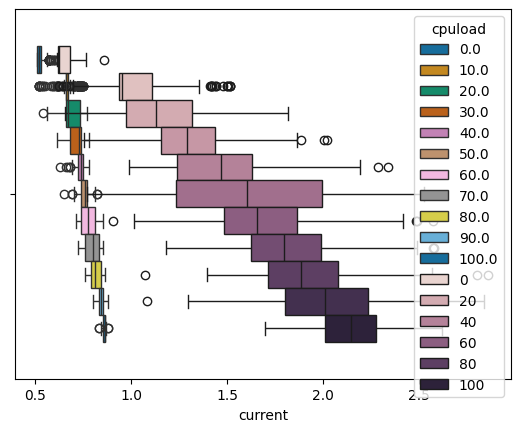

In [33]:
sns.boxplot(data=df_siglentlog, x='current', hue='cpuload', palette='colorblind')
sns.boxplot(data=df_energylog, x='current', hue='cpuload')
plt.savefig('boxplot current.png')

/var/folders/3_/r11vrzdx1s1gbnbp1ghbz_7h0000gn/T/ipykernel_36953/3765924874.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_siglentlog, x='cpuload', y='current',palette='colorblind')


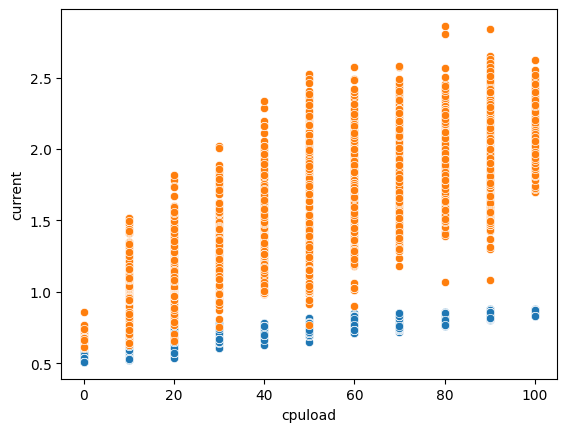

In [21]:
sns.scatterplot(data=df_siglentlog, x='cpuload', y='current',palette='colorblind')
sns.scatterplot(data=df_energylog, x='cpuload', y='current')
plt.savefig('scatterplot.png')

In [22]:
x = np.array(df_siglentlog['cpuload']).reshape((-1, 1))
y = np.array(df_siglentlog['current'])

coefficient of determination: 0.8112298462920746
intercept: 0.6042525109493591
slope: [0.00270467]


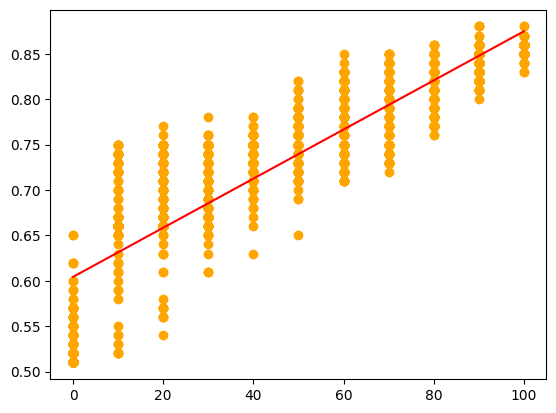

In [23]:
model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

y_pred = model.intercept_ + model.coef_ * x

#sns.scatterplot(data=df_siglentlog, x='cpuload', y='current')
plt.plot(x,y,'o',color='orange')
plt.plot(x,y_pred,'-r')

<Axes: xlabel='current'>

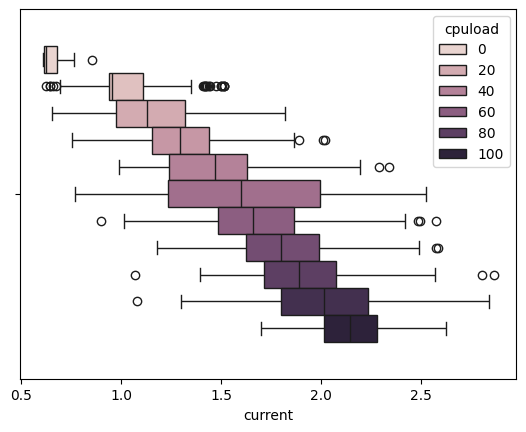

In [24]:
sns.boxplot(data=df_energylog, x='current', hue='cpuload')

In [25]:
x_e = np.array(df_energylog['cpuload']).reshape((-1, 1))
y_e = np.array(df_energylog['current'])

coefficient of determination: 0.712015684011643
intercept: 0.8502994202430818
slope: [0.01343076]


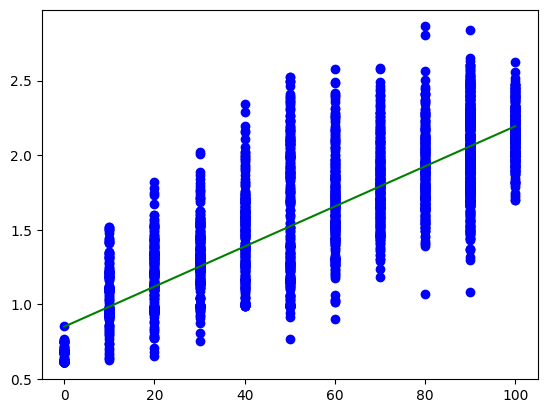

In [26]:
model = LinearRegression()
model.fit(x_e, y_e)

r_sq = model.score(x_e, y_e)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

y_e_pred = model.intercept_ + model.coef_ * x_e

#sns.scatterplot(data=df_siglentlog, x='cpuload', y='current')
plt.plot(x_e,y_e,'o',color='blue')
plt.plot(x_e,y_e_pred,'-g')

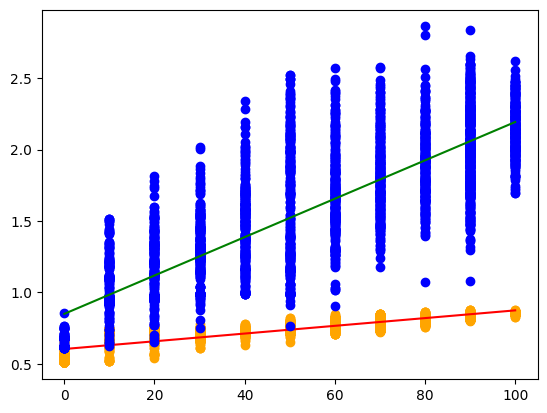

In [32]:

plt.plot(x,y,'o',color='orange')
plt.plot(x,y_pred,'-r')

plt.plot(x_e,y_e,'o',color='blue')
plt.plot(x_e,y_e_pred,'-g')
plt.savefig('scatterplot with CPU load to Current Prediction (Linear Regression).png')

In [28]:
# Ensure equal length for fair comparison
n = min(len(df_energylog), len(df_siglentlog))
energy_curr = df_energylog["current"].iloc[:n].values
siglent_curr = df_siglentlog["current"].iloc[:n].values

# Compute Pearson correlation
corr_val = pd.Series(energy_curr).corr(pd.Series(siglent_curr))
print("Correlation (Pearson r):", corr_val)


Correlation (Pearson r): 0.7994367098264606


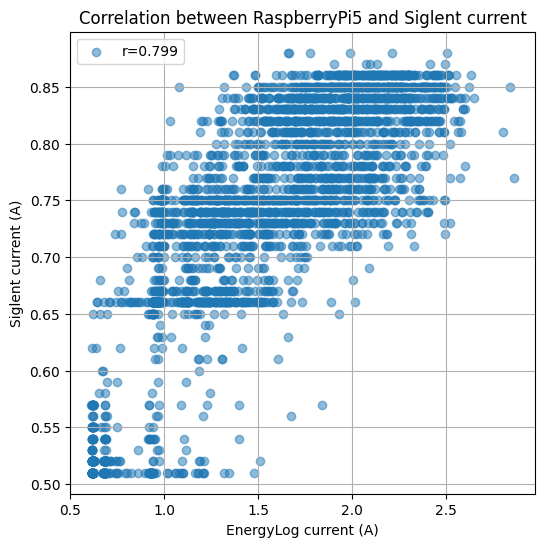

In [31]:
# --- Scatter plot ---
plt.figure(figsize=(6,6))
plt.scatter(energy_curr, siglent_curr, alpha=0.5, label=f"r={corr_val:.3f}")
plt.xlabel("EnergyLog current (A)")
plt.ylabel("Siglent current (A)")
plt.title("Correlation between RaspberryPi5 and Siglent current")
plt.legend()
plt.grid(True)
plt.savefig('correlation.png')
plt.show()


In [64]:
df_energylog['logger']='EnergyLog'
df_siglentlog['logger'] = 'SiglentLog'

In [323]:
df= pd.concat([df_energylog,df_siglentlog])

In [325]:
df = df.reset_index()

In [327]:
df

,index,time,voltage,current,cpuload,logger
0,184,5.547400e+01,0.874089,0.81263,0.0,EnergyLog
1,185,5.557200e+01,0.747569,0.62510,0.0,EnergyLog
2,186,5.567200e+01,0.747569,0.63403,0.0,EnergyLog
3,187,5.577200e+01,0.748913,0.62510,0.0,EnergyLog
4,188,5.587200e+01,0.749987,0.61617,0.0,EnergyLog
...,...,...,...,...,...,...
12848,4006,1.758019e+09,5.000000,0.86000,100.0,SiglentLog
12849,4007,1.758019e+09,5.000000,0.86000,100.0,SiglentLog
12850,4008,1.758019e+09,5.000000,0.87000,100.0,SiglentLog
12851,4009,1.758019e+09,5.000000,0.83000,100.0,SiglentLog


In [329]:
df = df.dropna()

<Axes: xlabel='current', ylabel='logger'>

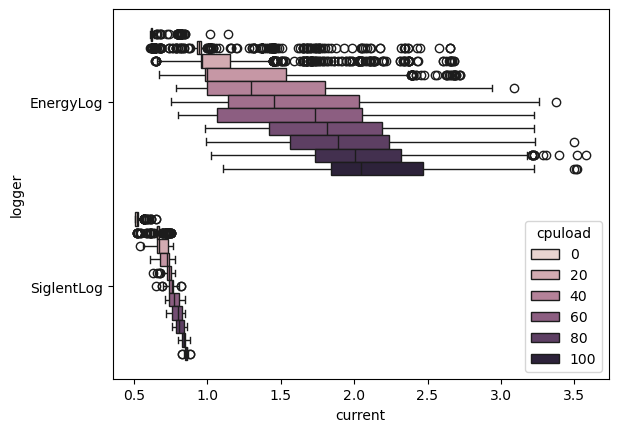

In [331]:
sns.boxplot(data=df, x='current', y='logger', hue='cpuload')

In [333]:
df.to_csv('all_logs_10_20_100.csv')

In [335]:
df_energylog.reset_index() 

KeyError: 'timestamp'

In [339]:
df_energylog

,index,time,voltage,current,cpuload,logger,time_datetime
0,184,55.474,0.874089,0.81263,0.0,EnergyLog,1970-01-01 00:00:00.000000055
1,185,55.572,0.747569,0.62510,0.0,EnergyLog,1970-01-01 00:00:00.000000055
2,186,55.672,0.747569,0.63403,0.0,EnergyLog,1970-01-01 00:00:00.000000055
3,187,55.772,0.748913,0.62510,0.0,EnergyLog,1970-01-01 00:00:00.000000055
4,188,55.872,0.749987,0.61617,0.0,EnergyLog,1970-01-01 00:00:00.000000055
...,...,...,...,...,...,...,...
9588,11978,1234.872,0.874089,2.11641,100.0,EnergyLog,1970-01-01 00:00:00.000001234
9589,11979,1234.972,0.873821,2.32180,100.0,EnergyLog,1970-01-01 00:00:00.000001234
9590,11980,1235.072,0.873552,1.72349,100.0,EnergyLog,1970-01-01 00:00:00.000001235
9591,11981,1235.172,0.874627,2.82188,100.0,EnergyLog,1970-01-01 00:00:00.000001235
